# ¡Llena ese carrito!: Reporte de hábitos de los consumidores

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.

El conjunto de datos proporcionado tiene modificaciones del original. Tamaño reducido para que los cálculos se hicieran más rápido y valores ausentes y duplicados. Se tuvo cuidado de conservar las distribuciones de los datos originales cuando se hicieron los cambios.

El objetivo es limpiar los datos y preparar un informe que brinde información sobre los hábitos de compra de los clientes de Instacart.

## Diccionario de datos

Hay cinco tablas en el conjunto de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

In [3]:
# importar librerías
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np


In [2]:
# leer conjuntos de datos en los DataFrames
# se leen los archivos con delimiter=';' ya que al abrir los archivos se pudo ver que ese era el delimitador
instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', delimiter=';')
products = pd.read_csv('/datasets/products.csv', delimiter=';')
aisles = pd.read_csv('/datasets/aisles.csv', delimiter=';')
departments = pd.read_csv('/datasets/departments.csv', delimiter=';')
order_products = pd.read_csv('/datasets/order_products.csv', delimiter=';')

In [3]:
# mostrar información del DataFrame
# se puede ver que hay valores vacios en la columna days_since_prior_order
# ademas, dicha columna es un float, probablemente por los valores nulos. Sin valores nulos deberia ser un int
instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
# se puede ver que hay filas vacias en la columna product_name
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
# se puede ver que no hay filas vacias
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
# no hay filas vacias
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame
# hay filas vacias en la columna add_to_cart_order
# la columna add_to_cart_order es un float debido a los valores nulos. Sin ellos deberia ser un int
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
- Tres de los 5 dataframes (order_products, products, intacart_orders) contienen valores vacios en una de sus columnas
- La columna days_since_prior_order del df instacart_orders y la columna add_to_cart_order del df order_products son floats debido a sus valores nulos (Nan es float). Si se eliminan los valores nulos, ambas columnas pueden ser ints. Se importa numpy en caso sea necesario hacer la comprobacion de arrays.
- Todas las columnas id de los dfs estan como ints, sin embargo podrian estar como strings o como categorias (de ser util). Esto debido a que al ser identificadores, no se realizan operaciones aritmeticas con ellas. Tenerlas como strings o categorias podria ser mas util en el futuro

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.
- Del paso anterior, se observa que las columnas id ya son numeros enteros. De todas maneras se puede verificar usando el meteodo dtypes.
- Los valores ausentes pueden ser identificados con el metodo isna() y pueden ser completados con el metodo fillna() o con el metodo replace().
- Los valores duplicados pueden ser identifcados usando un filtro con una mascara dada por el metodo duplicated(). Pueden ser eliminados usando el metodo drop_duplicates(). Finalmente, se verifica nuevamente con duplicated() si aun existen duplicados.


## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
# se usa un filtro usando como mascara el metodo duplicated()
instacart_orders[instacart_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Si, todas son ordenes hechas el miercoles a las 2 a.m

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
instacart_orders[(instacart_orders['order_dow'] == 3) & (instacart_orders['order_hour_of_day'] == 2)]


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?

Que de los 121 pedidos hechos el miercoles a las, 15 son pedidos duplicados. Son pocos y pueden ser descartados.

In [10]:
# Elimina los pedidos duplicados
# se elimina los duplicados usando el metodo drop_duplicates() y se resetea el index con el metodo reset_index()
instacart_orders.drop_duplicates(inplace=True)
instacart_orders.reset_index(inplace=True, drop=True)
instacart_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478947,3210681,5617,5,1,14,7.0
478948,3270802,112087,2,3,13,6.0
478949,885349,82944,16,2,11,6.0
478950,216274,4391,3,3,8,8.0


In [11]:
# Vuelve a verificar si hay filas duplicadas

# Se ve que el resultado es un df vacio
instacart_orders[instacart_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
# La suma de duplicados sobre la columna order_id da como resultado 0
instacart_orders['order_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos

- Se filtro el df para mostrar todas las filas duplicadas explicitamente. 15 filas
- Se observo que todos los duplicados corresponden a pedidos hechos el miercoles a las 2 am
- Se filtro el df para mostrar todos los pedidos hechos el miercoles a las 2 am, dando un total de 121
- Siendo pocos los duplicados en comparacion con el total de datos, y al tratarse de duplicados explictos. Se les elimina con el metodo drop_duplicates()
- Posteriormente se verifica que no existan mas filas duplicadas
- Finalmente se revisan duplicados unicamente en la columna 'order_id', al ser los valores de esta columna identificadores unicos para cada pedido

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas

# El resultado es un df vacio, indicando que no hay filas totalmente duplicadas
products[products.duplicated()]

,product_id,product_name,aisle_id,department_id


In [14]:
# Verifica únicamente si hay IDs duplicadas de productos

# El resultado de la suma de aplicar duplicated() sobre la columna 'product_id' da 0, indicando que no hay ids duplicados
products['product_id'].duplicated().sum()

0

In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

# El resultado arroja 1361 filas con nombres duplicados
# Sabemos por resultados anterios que esa columna cuenta con muchos faltantes, los cuales cuentan dentro de los duplicados
products['product_name'].str.lower().duplicated().sum()

1361

In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
# Se filtra el df para que solo considere las filas con productos no faltantes. Se aplican los metodos duplicated() y sum()
# El resultado indica que si ignoramos las filas con productos faltantes existen 104 productos duplicados
products[~products['product_name'].isna()]['product_name'].str.lower().duplicated().sum()

104

In [17]:
# Esta celda fue agregada 
# Eliminar duplicados
# Primero se convierten los valores de la columna 'product_name' a minuscula
products['product_name'] = products['product_name'].str.lower()
# Luego se procede a encontrar los valores duplicados que no son Nan y se guardan sus indices
non_nan_duplicates_index = products[(~products['product_name'].isna()) & (products['product_name'].duplicated())].index
# Finalmente, se utilizan dichos indices para eliminar las filas con el metodo drop y se hace el recuento de duplicados
products.drop(non_nan_duplicates_index, inplace=True)
products[~products['product_name'].isna()].duplicated(subset=['product_name']).sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

- Se verifico que no existen filas totalmente duplicadas
- Se observo que habian 1361 valores duplicados en la columna 'product_names' (luego de convertir todo a minusculas). Esta columna cuenta con valores ausentes
- Al filtrar los valores ausentes, se verifico que aun existen 104 nombres de productos duplicados
- Se procedio a cambiar toda la columna a minusculas
- Se obtuvo los indices de esos 104 nombres duplicados
- Se elimino las filas donde esos nombres duplicados estaban presentes
- Se realizo el recuento de valores duplicados no nulos para verificar que el resultado es 0

### `departments` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas
# Se observa con el metodo duplicated() y sum() que no hay filas totalmente duplicadas
departments.duplicated().sum()

0

In [19]:
# Revisa únicamente si hay IDs duplicadas de productos
# Este df no es de productos, se verifica si hay duplicados de id de departamento
# Con el procedimiento anterior se verifica que no hay duplicados en 'department_id'
departments['department_id'].duplicated().sum()

0

In [20]:
# Esta celda fue agregada
# Se verifica si hay duplicados en los nombres de los departamentos. No hay nombres duplicados tampoco
departments['department'].str.lower().duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

- Se verifico que no existen filas completamente duplicadas
- De igual manera se verifico que no existen valores duplicados en ninguna de las dos columnas
- Al ser un df sin valores ausentes, se concluye que este df no tiene duplicados.

### `aisles` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
# Con el procedimiento anterior, se verifican que no hay filas totalmente duplicadas
aisles.duplicated().sum()

0

In [22]:
# Revisa únicamente si hay IDs duplicadas de productos
# Con el procedimiento anterior, se verifica que no hay ids duplicados
aisles['aisle_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

- Se verifico que no existen filas completamente duplicadas
- Al ser un df sin valores ausentes, se concluye que este df no tiene duplicados.

### `order_products` data frame

In [23]:
# Revisa si hay filas totalmente duplicadas
# Con el procedimiento anterior, se verifica que no hay filas completamente duplicadas
order_products.duplicated().sum()

0

In [24]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
# Se procede a verificar duplicados en cada columna
order_products['order_id'].duplicated().sum()


4094961

In [25]:
# Hay muchos valores duplicados en la columna 'order_id', se procede a indagar mas a fondo
order_products[order_products['order_id'] == 2867619]
# Se trata de pedidos con mas de un producto, 'order_id' identifica al pedido asi que tiene sentido

,order_id,product_id,add_to_cart_order,reordered
209,2867619,21616,13.0,0
367,2867619,48094,9.0,0
588554,2867619,10199,8.0,1
597172,2867619,46900,22.0,0
1581682,2867619,40078,7.0,1
1790435,2867619,34190,10.0,0
1905810,2867619,45788,18.0,0
1910919,2867619,34786,15.0,0
1916515,2867619,43662,24.0,0
2160728,2867619,27093,23.0,0


In [26]:
# De esa manera, el identificador unico de cada fila se convierte en el par ['order_id', 'product_id']
# Esto significa que la key de esta table es una key compuesta, el identificador unico de cada fila
# Se verica que no existen duplicados de ambas filas a la vez
order_products.duplicated(subset=['order_id', 'product_id']).sum()

0

In [27]:
# No se verifican duplicados solo en la columna 'product_id' porque tiene sentido que se repitan los productos, ya sea en la misma orden o en ordenes diferentes
# Se verifican duplicados en 'add_to_cart_order'. Se sabe que esta columna cuenta con valores ausentes, mas los duplicados los superan
order_products['add_to_cart_order'].duplicated().sum()

4544942

In [28]:
# Al tratarse de posiciones dentro del carrito, tiene sentido que los valores dentro de la columna se repitan
# No se examina la columna 'reordered' al tratarse solo de valores booleanos
order_products[order_products['add_to_cart_order'].duplicated()]

,order_id,product_id,add_to_cart_order,reordered
2,2261212,26683,1.0,1
6,644579,12341,5.0,1
9,420019,23315,4.0,1
12,522547,40571,10.0,1
14,1961225,37553,1.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


Describe brevemente tus hallazgos y lo que hiciste con ellos.

- Se verifico que no existen filas completamente duplicadas
- Ya que pueden haber muchos productos dentro de una misma orden, se tomo el par ['order_id, 'product_id] como identificador compuesto de cada fila
- Se verifica que no existen valores duplicados de este identificador
- Las demas columnas cuentan co valores duplicados dentro de ellas, mas es producto de la naturleza de los datos que alojan
- Se concluye que este df no tiene duplicados.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [29]:
# Encuentra los valores ausentes en la columna 'product_name'
# Se filtran los valores nulos usando el metodo isna()
products[products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

- Se encontraron 1258 filas con valores ausentes en la columna 'product_names'
- En las columnas 'aisle_id' y 'department_id' parece que los valores corresponden al mismo 'aisle' y al mismo departamento

In [30]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
# Se filtran los valores nulos que pertenecen ademas al aisle 100
products[(products['product_name'].isna()) & (products['aisle_id'] == 100)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

- Se verifa que todos los valores ausentes pertecenes al 'aisle' con ID 100

In [31]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
# Se filtran los valores nulos que pertenecen ademas al departamento 21
products[(products['product_name'].isna()) & (products['department_id'] == 21)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

- Se verifica que todos los valores nulos ademas de pertenecer al aisle con id 100 tambien pertenecen al departamento con id 21

In [32]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
# Se utliza el metodo loc para seleccionar los valores de interes
print(departments.loc[20, :])
print()
print(aisles.loc[99, :])

department_id         21
department       missing
Name: 20, dtype: object

aisle_id        100
aisle       missing
Name: 99, dtype: object


Describe brevemente cuáles son tus hallazgos.

- Se observa que tanto el departamento de id 21 como el aisle de id 100 corresponden a valores faltantes en las tablas departments y aisles. Ambos estan como 'missing'

In [33]:
# Completa los nombres de productos ausentes con 'Unknown'
# Se rellena los valores ausentes con la cadena 'Unkown'. Se verifica la suma de valores ausentes como 0
products['product_name'] = products['product_name'].fillna('Unknown') 
products['product_name'].isna().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

- Se mostraron los valores ausentes en la columna 'product_name'
- Se observo que tenian en comun el mismo aisle_id y department_id
- Ambos ids corresponden a valores austentes en sus correspondientes tablas ('missing')
- Se reemplazo todos los valores ausentes por la cadena 'Unknown' ya que puede tratarse de datos recuperables en un futuro.
- Se verifica que ya no existen valores ausentes en la columna 'product_name'

### `orders` data frame

In [34]:
# Encuentra los valores ausentes
# Se utiliza un filtro con el metodo isna() para encontrar valores ausentes en la columna. 28817 valores ausentes
instacart_orders[instacart_orders['days_since_prior_order'].isna()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478880,2589657,205028,1,0,16,NaN
478881,2222353,141211,1,2,13,NaN
478907,2272807,204154,1,1,15,NaN
478911,2499542,68810,1,4,19,NaN


In [35]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
# Todos los valores ausentes corresponden en la columna days since prior order corresponden a filas con el primer pedido del cliente
instacart_orders[(instacart_orders['days_since_prior_order'].isna()) & (instacart_orders['order_number'] != 1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Describe brevemente tus hallazgos y lo que hiciste con ellos.

- Se mostraron los valores ausentes que corresponden a la columna 'days_since_prior_order'
- Se observo que todos estos valores corresponden a filas guardando el primer pedido de cada cliente
- Al ser el primer pedido del cliente, no existe un pedido anterior y por ende tampoco un numero de dias desde el anterior pedido
- Al no existir otra alternativa (o mejor alternativa) de como almacenar esta informacion, se deja la tabla sin modificacion (brevemente se considera la posibilidad de reemplazarlo por 0. Sin embargo, si un cliente realiza dos pedidos el mismo dia, esto tambien cuenta como 0 y es un escenario distinto).
- Esta tabla no contiene valores ausentes, sino que los valores almacenados como NaN aportan informacion.

### `order_products` data frame

In [36]:
# Encuentra los valores ausentes
# Se filtran los valores con el metodo isna()
order_products[order_products['add_to_cart_order'].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [37]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
order_products['add_to_cart_order'].describe()

count    4.544171e+06
mean     8.351669e+00
std      7.080368e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      6.400000e+01
Name: add_to_cart_order, dtype: float64

Describe brevemente cuáles son tus hallazgos.

- El maximo valor de productos en un solo pedido es de 64. Considerando que describe() no esta tomando valores ausentes, podria haber un numero mayor. Esto tambien considerando la distribucion. Con un percentil 75 de 11 y una maxima de 64, indica que existen valores atipicos.

In [38]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
# se filtran los datos con el metodo isna() . Se selecciona la columna indicada y se guarda en una variable
nan_order_ids = order_products[order_products['add_to_cart_order'].isna()]['order_id']

In [39]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

# Se filtra con el metodo isin() y usando la variable anterior
# Se agrupan los elementos por order_id con groupby() 
# Se cuentan los elementos con el metodo count() y se selecciona la columna product_id
# Se obtiene el minimo valor con el metodo min. Minimo valor de 65
order_products[order_products['order_id'].isin(nan_order_ids)].groupby('order_id').count()['product_id'].min()

65

Describe brevemente cuáles son tus hallazgos.

- Se observo que segun los estadisticos, la columna presentaba valores atipicos
- Se guardaron las ordenes que contenian al menos un valor ausente
- Con esa informacion se pudo filtrar todas las ordenes que contenian al menos un valor ausente
- Agrupando estos datos y contando los productos en cada orden se pudo observar que todas las ordenes con valores ausentes excedian el numero maximo reportado de 64 productos.

In [40]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
# Se rellenan los valores ausentes con fillna()
# Se cambia el tipo de dato de la columna a int64 con astype()
# Se muestran los tipos de datos de las columnas con dtypes
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int64')
order_products.dtypes

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

Describe brevemente tus hallazgos y lo que hiciste con ellos.

- Se vio que existian valores atipicos en la columna
- Se filtraron todas las ordenes con valores ausentes y se observo que todas superaban el maximo de productos (segun los estadisticos) de 64.
- Se desconoce que valores puede tomar cada valor ausente, y se reemplazan todos por 999
- Finalmente, se puede convertir toda la columna a valores enteros, ahorrar espacio y mantener la misma cantidad de informacion.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

- Del df orders se pudieron eliminar facilamente los pocos duplicados explicitos que habian. Todos corresponden a pedidos hechos el mismo dia a la misma hora. Un posible error en el sistema durante la madrugada. Al ser solo 15, se les puede eliminar sin afectar los patrones en la base de datos.
- En el df products, no se encontraron duplicados explicitos, mas si duplicados en los nombres de los productos. Una vez filtrados los datos ausentes, se pudo proceder a eliminar estos duplicados en los productos sin perder informacion ya que no es necesario contar con dos o mas productos con el mismo nombre en la tabla. Si se trabajase con una tabla de stock de productos, hubiera sido necesario hacer un conteo de los stocks en los nombres duplicados y sumarlos para no perder informacion.
- Los df aisles y departments no cuentan con valores duplicados, ni explicitos ni en las columnas.
- El df order_products parece contar con muchos duplicados no explicitos. Sin embargo, al analizar bien los datos, estos duplicados son producto mismo de la naturaleza de los datos. No se requiere procesar estos aparentes duplicados ya que contienen informacion valiosa de cada orden y los productos de esta.

- El df products cuenta con muchos valores ausentes. Todos estos valores corresponden a aisles y departamentos faltantes (missing). Se rellena los valores ausentes como desconocidos. Esto debe ser reportado ya que no es informacion que se puede descartar, sino es informacion que debe conseguirse.
- El df orders cuenta con valores ausentes, aparentemente. Sin embargo, estos aportan informacion. Corresponden a los clientes que solo han hecho su primer pedido, (no puede haber un conteo de dias desde el ultimo pedido, ya que solo han hecho uno). No se puede cambiar el valor a otro, ya que causaria una alteracion en el comportamiento de los datos. 
- El df order products contiene muchos valores ausentes. Estos son producto de un aparente valor maximo para la cantidad de productos por pedido de 64 productos. Culquier orden con una cantidad mayor de pedidos tendra valores ausentes en una columna a partir del producto 65 en adelante. En este caso, ya perdimos la informacion y no podemos reemplazarla con algun valor relevante. Se remplazan todos los datos ausentes por 999 para que no interfieran con los datos que se encuentran en un rango 'normal' de cantidad de productos por pedido.

- En resumen, algunas tablas contaban con duplicados explicitos o por columna que eran faciles de tratar. En otro caso, estos duplicados eran aparentes, mas aportan informacion relevante y se les deja tal cual en la tabla.
- En el caso de los datos ausentes, estos no se pudieron eliminar tan facilmente. En un caso esto se debio producto a informacion desconocida que debe conseguirse en el futuro, y se manejo con un reemplazo simple de cadena. En otro, eran producto de la naturaleza misma de los datos y la falta de poder expresar la informacion que cargan de otra manera. Y en el ultimo, un aparente bug que impede almacenar valores superiores a cierto limite y se tuvo que convertir en un valor que no estropee un futuro analisis. En los tres casos, estos datos guardan informacion y no se les debe eliminar.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [41]:
# Se verifican los rangos de los valores utilizando los metodos min() y max()
print(instacart_orders['order_hour_of_day'].min(), instacart_orders['order_hour_of_day'].max())

print(instacart_orders['order_dow'].min(), instacart_orders['order_dow'].max())

0 23
0 6


Escribe aquí tus conclusiones

- Los valores de las columnas estan en el rango apropiado (0 y 23 para horas, 0 a 6 para dias)

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [42]:
# Se agrupan los datos por la hora del dia con el metodo groupby() y se cuentan con el metodo count()
instacart_orders.groupby('order_hour_of_day').count()['order_id']

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_id, dtype: int64

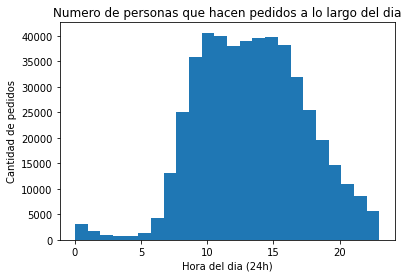

In [43]:
# Se usa el metodo plot para graficar un histograma con 24 bines (uno por cada hora del dia)
instacart_orders['order_hour_of_day'].plot(kind='hist',
                                           bins=24,
                                           title='Numero de personas que hacen pedidos a lo largo del dia')
plt.xlabel('Hora del dia (24h)')
plt.ylabel('Cantidad de pedidos')
plt.show()

In [44]:
# Sin embargo, esto da como resultado el numero de pedidos hechos, una misma persona puede realizar mas de un pedido
# En vez de usar el metodo count, se usa el metoho nunique(), la cantidad de usuarios es menor a la cantidad de pedidos
# Esto va de la mano con lo mencoinado anteriormente, una misma persona puede hacer mas de un pedido
instacart_orders.groupby('order_hour_of_day').nunique()

,order_id,user_id,order_number,order_dow,days_since_prior_order
order_hour_of_day,,,,,
0,3180,2991,93,7,31
1,1763,1671,87,7,31
2,989,958,82,7,31
3,770,744,77,7,31
4,765,735,74,7,31
5,1371,1281,90,7,31
6,4215,3757,99,7,31
7,13043,10993,100,7,31
8,25024,20268,100,7,31


In [45]:
# Seleccionando la columna user_id, podemos mostrar la cantidad de usuarios (personas) que hacen pedidos a lo largo del dia
instacart_orders.groupby('order_hour_of_day').nunique()['user_id']

order_hour_of_day
0      2991
1      1671
2       958
3       744
4       735
5      1281
6      3757
7     10993
8     20268
9     28112
10    32195
11    32660
12    31754
13    32433
14    32797
15    32894
16    31579
17    26825
18    21795
19    17026
20    12891
21     9806
22     7670
23     5167
Name: user_id, dtype: int64

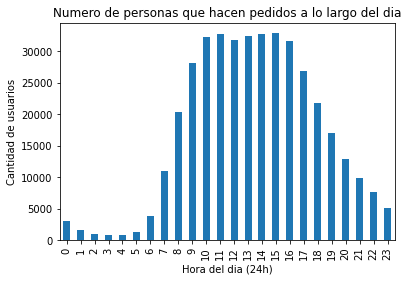

In [46]:
# Se usa el metodo plot para graficar un grafico de barras
instacart_orders.groupby('order_hour_of_day').nunique()['user_id'].plot(kind='bar',
                                                                        title='Numero de personas que hacen pedidos a lo largo del dia')
plt.xlabel('Hora del dia (24h)')
plt.ylabel('Cantidad de usuarios')
plt.show()

Escribe aquí tus conclusiones

- La mayor cantidad de pedidos se registran entre las 10 y las 16 horas
- Esto concuerda a su vez con la cantidad de usuarios que hacen pedidos, el rango con mator cantidad de usuarios realizando pedidos es de 10h a 16h.

### [A3] ¿Qué día de la semana compran víveres las personas?

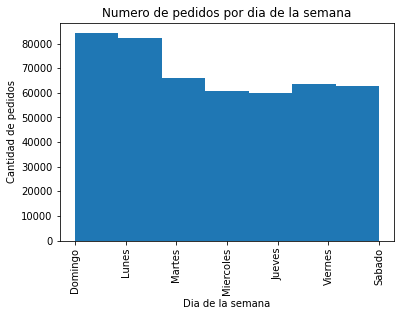

In [47]:
# Se usa el metodo plot para graficar un histograma con 7 bines (uno por cada dia de la semana)
instacart_orders['order_dow'].plot(kind='hist',
                                   bins=7,
                                   title='Numero de pedidos por dia de la semana')
plt.xlabel('Dia de la semana')
plt.ylabel('Cantidad de pedidos')
plt.xticks([0,1,2,3,4,5,6],['Domingo', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado'], rotation=90)
plt.show()

Escribe aquí tus conclusiones

- La mayor cantidad de pedidos se hacen los dias Domingo y Lunes, el resto de dias la cantidad de pedidos es aproximadamente la misma (observando parece estar dentro de un margen de 10%)

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [48]:
# Se utiliza el metodo describe para obtener el valor maximo y minimo de la columna 'days_since_prior_order'
# Tambien se obtienen otros estadisticos importantes
# Minimo valor de 0 y maximo valor de 30 (pedidos el mismo dia y pedidos mensuales, respectivamente)
instacart_orders['days_since_prior_order'].describe()

count    450135.000000
mean         11.101814
std           9.190004
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64

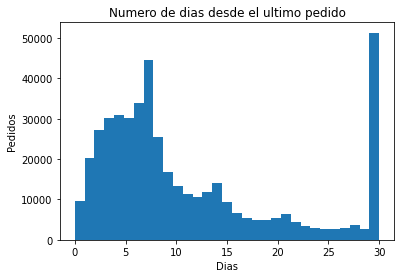

In [49]:
# # Se usa el metodo plot para graficar un histograma con 31 bines (uno por cada dia - 0: mismo dia, 30: luego de 30 dias)
instacart_orders['days_since_prior_order'].plot(kind='hist',
                                                bins=31,
                                                title='Numero de dias desde el ultimo pedido')
plt.xlabel('Dias')
plt.ylabel('Pedidos')
plt.show()

Escribe aquí tus conclusiones

- La cantidad de dias que esperan las personas para realizar otro pedido oscila entre 0 y 30 dias. Donde 0 corresponde a que hicieron su siguiente pedido el mismo dia y 30 corresponde a que esperaron 30 dias para realizar su siguiente pedido.
- Observamos que hay muchos pedidos que se realizan luego de 30 dias del pedido anterior. Esto puede indicar compras que se programan mensualmente. Es mas, la mayor cantidad de pedidos son de este tipo.
- En promedio, las personas esperan 11 dias. Sin embargo, observando la distribucion vemos que la gran cantidad de pedidos realizados mensualmente mueve la media. Un valor mas representativo de estos datos es la mediana, que tiene un valor de 7.
- El valor de 7 para la mediana, tambien concuerda para la moda (ignorando los pedidos caad 30 dias). Tiene sentido concluir que lo mas comun/popular en la plataforma es hacer pedidos semanales y mensuales.
- Se observan ademas ligeros picos locales en 14 dias (dos semanas) y 21 dias (tres semanas). Esto puede corresponder a una programacion bisemanal y trisemanal de pedidos (una vez cada dos y tres semanas respectivamente). Siendo entre estas dos mas comun la bisemanal.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

<AxesSubplot:xlabel='order_hour_of_day'>

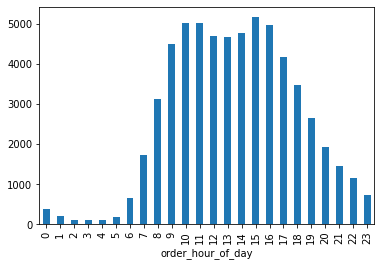

In [50]:
# Se filtra la tabla para el dia miercoles, se agrupan los datos con groupby(), se aplica el metodo count() y se grafica
instacart_orders[instacart_orders['order_dow'] == 3].groupby('order_hour_of_day').count()['order_id'].plot(kind='bar')

<AxesSubplot:xlabel='order_hour_of_day'>

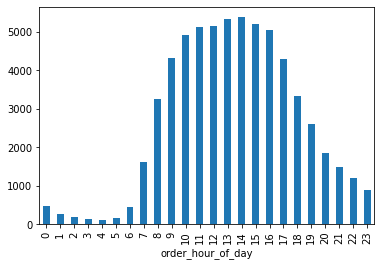

In [51]:
# Se filtra la tabla para el dia sabado, se agrupan los datos con groupby(), se aplica el metodo count() y se grafica
instacart_orders[instacart_orders['order_dow'] == 6].groupby('order_hour_of_day').count()['order_id'].plot(kind='bar')

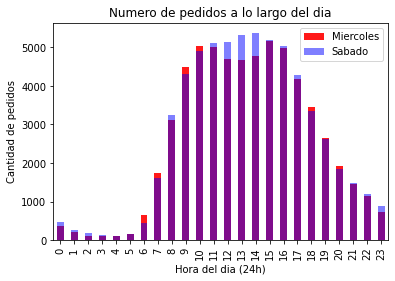

In [52]:
#
instacart_orders[instacart_orders['order_dow'] == 3].groupby('order_hour_of_day').count()['order_id'].plot(kind='bar',
                                                                                                          color='red',
                                                                                                          alpha=0.9)
instacart_orders[instacart_orders['order_dow'] == 6].groupby('order_hour_of_day').count()['order_id'].plot(kind='bar',
                                                                                                          color='blue',
                                                                                                          alpha=0.5)
plt.xlabel('Hora del dia (24h)')
plt.ylabel('Cantidad de pedidos')
plt.title('Numero de pedidos a lo largo del dia')
plt.legend(['Miercoles', 'Sabado'])
plt.show()

Escribe aquí tus conclusiones

- Se graficaron las distribuciones de ambos dias de manera independiente como graficos auxiliares
- Al superponer los graficos, se puede observar que las distribuciones son muy parecidas
- Las diferencias mas importantes se encuentran entre las 12h y las 14h, donde los pedidos del dia sabado superan a los del dia miercoles
- Existen otros momentos del dia donde los pedidos del dia miercoles superan los del sabado (6h, 7h-10h, 18h-20h) pero la diferencia es poca
- El resto de horas del dia la cantidad de pedidos del dia sabado supera los del dia miercoles, pero la diferencia es poca
- Es sensato concluir que el dia sabados cuenta con una cantidad mayor de pedidos (se puede corroborar con el metodo sum())

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [53]:
# Se agrupan los datos por order_number con groupby() y se aplica el metodo count para observar los datos
instacart_orders.groupby('order_number').count()

,order_id,user_id,order_dow,order_hour_of_day,days_since_prior_order
order_number,,,,,
1,28817,28817,28817,28817,0
2,28633,28633,28633,28633,28633
3,28685,28685,28685,28685,28685
4,28703,28703,28703,28703,28703
5,25661,25661,25661,25661,25661
...,...,...,...,...,...
96,220,220,220,220,220
97,221,221,221,221,221
98,191,191,191,191,191


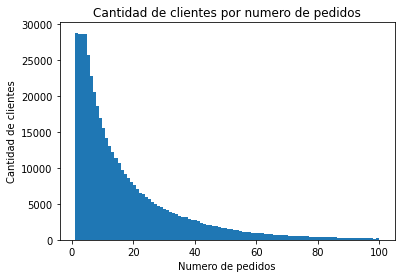

In [54]:
# Se opta por utilizar un histograma en vez de un grafico de barras
# Se grafica un histograma sobre 'order_number' con 100 bines y se verifica que concuerda con los datos anteriores
instacart_orders['order_number'].plot(kind='hist',
                                      bins=100,
                                     title='Cantidad de clientes por numero de pedidos')
plt.xlabel('Numero de pedidos')
plt.ylabel('Cantidad de clientes')
plt.show()

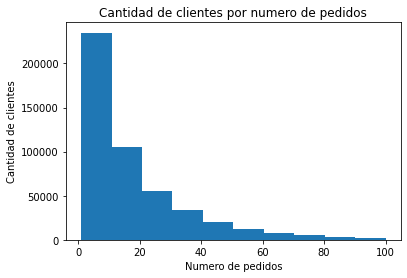

In [55]:
# Se grafica un histograma sobre 'order_number' con 10 bines para sacar mayores conclusiones
instacart_orders['order_number'].plot(kind='hist',
                                      bins=10,
                                     title='Cantidad de clientes por numero de pedidos')
plt.xlabel('Numero de pedidos')
plt.ylabel('Cantidad de clientes')
plt.show()
# Dado lo uniforme del decaimiento de la distribucion, no se mayores conclusiones

Escribe aquí tus conclusiones

- Se puede observar que el mayor numero de clientes suele realizar una menor cantidad de pedidos. Es decir, a mayor cantidad de pedidos, menor cantidad de cleintes que hacen dichos pedidos. Esto no es de sorprender ya que seria raro que que un gran numero de clientes realiza a su vez un gran numero de pedidos.
- Lo que sorprende es lo uniforme del decaimiento de la distribucion. Esto podria ser modelado a futuro para tener un modelo que nos prediga la cantidad de clientes que haran cierto numero de pedidos. Algo del estilo f(x) = Ax^b

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [56]:
# Se filtra la columna product_id y se cuenta la cantidad de veces que se repite cada id con el metodo value_counts()
# Se seleccionan los ids de los 20 productos mas populares y se guardan en una variable
top20_product_ids = order_products['product_id'].value_counts().index[0:20]
print(top20_product_ids)

Int64Index([24852, 13176, 21137, 21903, 47209, 47766, 47626, 16797, 26209,
            27845, 27966, 22935, 24964, 45007, 39275, 49683, 28204,  5876,
             8277, 40706],
           dtype='int64')


In [57]:
# Se filtra la tabla usando los indices hallados previamente
products[products['product_id'].isin(top20_product_ids)]

,product_id,product_name,aisle_id,department_id
5875,5876,organic lemon,24,4
8276,8277,apple honeycrisp organic,24,4
13175,13176,bag of organic bananas,24,4
16796,16797,strawberries,24,4
21136,21137,organic strawberries,24,4
21902,21903,organic baby spinach,123,4
22934,22935,organic yellow onion,83,4
24851,24852,banana,24,4
24963,24964,organic garlic,83,4
26208,26209,limes,24,4


In [58]:
# Mostramos los resultados en orden de popularidad
# Se crea un df auxiliar
products_top20 = products[products['product_id'].isin(top20_product_ids)][['product_id', 'product_name']]
# Se crea un indice auxiliar
top20_product_ids_Series = pd.Series(top20_product_ids)
products_top20['index'] = top20_product_ids_Series.sort_values().index
# Se ordenan los resultados de acorde al indice auxiliar
products_top20.sort_values('index')[['product_id', 'product_name']]

,product_id,product_name
24851,24852,banana
13175,13176,bag of organic bananas
21136,21137,organic strawberries
21902,21903,organic baby spinach
47208,47209,organic hass avocado
47765,47766,organic avocado
47625,47626,large lemon
16796,16797,strawberries
26208,26209,limes
27844,27845,organic whole milk


Escribe aquí tus conclusiones

- Casi todos los 20 productos mas populares pertecenen al mismo departamento (id 4, produce), salvo por la leche organica
- Casi todos los 20 productos mas populares son productos organicos
- Casi todos los 20 productos mas populares son frutas o verduras
- Casi todos 20 productos mas populares pertenecen unicamente a 3 ailes: 24, 83, 123
- Se puede obtener la informacion pedida con agrupacion y filtrado convencional. Para mostrarla en el orden de popularidad se hizo uso de una df auxiliar con una columna de indices auxiliares para el ordenamiento

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

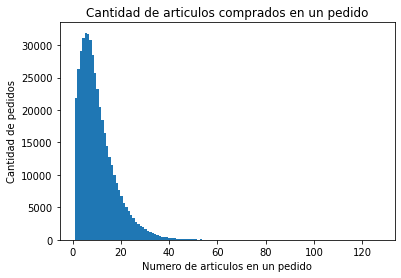

In [59]:
# Se agrupan los datos por numero de orden y se cuentan la cantidad de filas en la columna 'add_to_cart_order'
# Se grafica un histograma de 127 bines (numero maximo de articulos por pedido)
order_products.groupby('order_id').count()['add_to_cart_order'].plot(kind='hist',
                                                                     bins=127,
                                                                     title='Cantidad de articulos comprados en un pedido')
plt.xlabel('Numero de articulos en un pedido')
plt.ylabel('Cantidad de pedidos')
plt.show()

In [60]:
order_products.groupby('order_id').count()['add_to_cart_order'].describe()

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: add_to_cart_order, dtype: float64

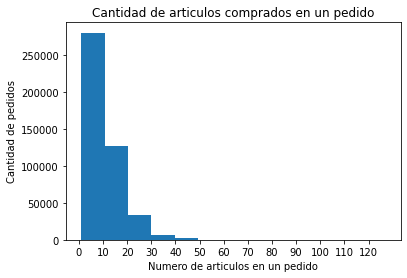

In [61]:
# 127 bines permite observar individualmente todas las cantidades de articulos, mas es dificil sacar conclusiones
# Se grafica un histograma de 13 bines (numero maximo de articulos por pedido)
order_products.groupby('order_id').count()['add_to_cart_order'].plot(kind='hist',
                                                                     bins=13,
                                                                     title='Cantidad de articulos comprados en un pedido')
plt.xlabel('Numero de articulos en un pedido')
plt.ylabel('Cantidad de pedidos')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100 ,110, 120])
plt.show()

Escribe aquí tus conclusiones

- De los estadisticos podemos observar que existen muchos valores atipicos (el percentil 75 es 14 y el maximo es 127). Por tanto, la mediana de 8 articulos por pedido es un valor mas representativo de los datos que la media de 10 articulos.
- Del histograma inicial podemos ver que el numero de articulos mas comun por pedido (moda) oscila tambien por la mediana.
- Rediciendo la cantidad de bines del histograma, podemos concluir que las personas suelen pedir entre 1 a 10 articulos por pedido en su mayoria. Y a mayor sea la cantidad de articulos (por ejemplo, de 10 a 20), menor es la cantidad de pedidos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [62]:
# Se filtra la tabla para obtener solo los productos repedidos. Se cuentan las instancias de cada id de producto
print('Cantidad de veces que se ha vuelto a pedir un producto')
print(order_products[order_products['reordered'] == 1]['product_id'].value_counts())

top20_reordered_products_ids = order_products[order_products['reordered'] == 1]['product_id'].value_counts().index[0:20]
print()
print('Ids de los 20 productos mas repedidos, en orden')
print(top20_reordered_products_ids)

Cantidad de veces que se ha vuelto a pedir un producto
24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
         ...  
2591         1
29201        1
27154        1
10789        1
2049         1
Name: product_id, Length: 36228, dtype: int64

Ids de los 20 productos mas repedidos, en orden
Int64Index([24852, 13176, 21137, 21903, 47209, 47766, 27845, 47626, 27966,
            16797, 26209, 22935, 24964, 45007, 49683, 28204,  8277, 39275,
             5876, 49235],
           dtype='int64')


In [63]:
# Se filtra la tabla de products para obtener unicamente los productos que corresponden a los ids de los 20 mas repedidos
products[products['product_id'].isin(top20_reordered_products_ids)]

,product_id,product_name,aisle_id,department_id
5875,5876,organic lemon,24,4
8276,8277,apple honeycrisp organic,24,4
13175,13176,bag of organic bananas,24,4
16796,16797,strawberries,24,4
21136,21137,organic strawberries,24,4
21902,21903,organic baby spinach,123,4
22934,22935,organic yellow onion,83,4
24851,24852,banana,24,4
24963,24964,organic garlic,83,4
26208,26209,limes,24,4


In [64]:
# Mostramos los resultados en orden de popularidad
# Se crea un df auxiliar
reordered_products_top20 = products[products['product_id'].isin(top20_reordered_products_ids)][['product_id', 'product_name']]
# Se crea un indice auxiliar
top20_reordered_product_ids_Series = pd.Series(top20_reordered_products_ids)
reordered_products_top20['index'] = top20_reordered_product_ids_Series.sort_values().index
# Se ordenan los resultados de acorde al indice auxiliar
reordered_products_top20.sort_values('index')[['product_id', 'product_name']]

,product_id,product_name
24851,24852,banana
13175,13176,bag of organic bananas
21136,21137,organic strawberries
21902,21903,organic baby spinach
47208,47209,organic hass avocado
47765,47766,organic avocado
27844,27845,organic whole milk
47625,47626,large lemon
27965,27966,organic raspberries
16796,16797,strawberries


Escribe aquí tus conclusiones

- Las conclusiones son casi las mismas que para el caso similar anterior de productos mas populares
- Casi todos los 20 productos mas repedidos pertecenen al mismo departamento (id 4, produce)
- La mayoria de los 20 productos mas repedidos son productos organicos
- La mayoria de los 20 productos mas repedidos son frutas o verduras
- Casi todos 20 productos mas populares pertenecen unicamente a 3 ailes: 24, 83, 123
- Tiene sentido que los 20 productos mas populares sean los 20 productos mas repedidos. Si un producto es popular, usualmetente es repedido.
- Se puede obtener la informacion pedida con agrupacion y filtrado convencional. Para mostrarla en el orden de popularidad se hizo uso de una df auxiliar con una columna de indices auxiliares para el ordenamiento

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [65]:
# Se agrupan los datos por id de producto y se calcula la media de la columna 'reordered'
# Al sumar todos las veces que se repide un producto y dividiendo sobre el total de pedidos se calcula la tasa de repeticion
order_products.groupby('product_id').mean()['reordered'].sort_values(ascending=False)

product_id
14721    1.0
20949    1.0
6723     1.0
6732     1.0
45088    1.0
        ... 
10485    0.0
37690    0.0
10484    0.0
10474    0.0
42984    0.0
Name: reordered, Length: 45573, dtype: float64

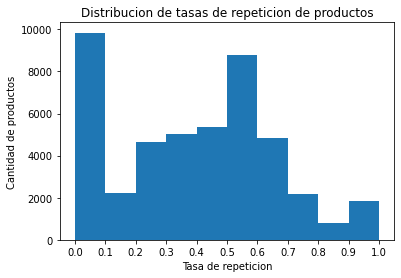

In [66]:
# Se grafica un histograma de 10 bines para distribuir las tasas de repeticion en pasos de 10%
order_products.groupby('product_id').mean()['reordered'].plot(kind='hist',
                                                              bins=10,
                                                              title='Distribucion de tasas de repeticion de productos')
plt.xlabel('Tasa de repeticion')
plt.ylabel('Cantidad de productos')
plt.xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.show()

In [67]:
# Se utiliza el metodo value_counts() para observar las tasas de repeticion mas populares
order_products.groupby('product_id').mean()['reordered'].sort_values(ascending=False).value_counts()

0.000000    9345
0.500000    3273
0.333333    2046
1.000000    1809
0.250000    1266
            ... 
0.242105       1
0.480226       1
0.524038       1
0.623457       1
0.528070       1
Name: reordered, Length: 6118, dtype: int64

Escribe aquí tus conclusiones

- La mayoria de productos tienen una tasa de repeticion entr 0 y 10%. Esto debido a que la tasa de repeticion mas popular es de 0% que corresponde a los productos que no han sido repedidos (9000 valores de los 10000 en este bin).
- Ignorando estos datos, la tasa de repeticion mas popular entre los productos que si se repiden es de entre 50% y 60%. Es decir, la mayoria de productos que se repiden se repiden aproximadamente la mitad del tiempo (la mitad de todos sus pedidos son repedidos).
- Luego, la mayor parte del resto de los pedidos tiene tasas de repeticion que sueles oscilar entre 20% y 70% (ignorando el rango 50% a 60%).
- Por ultimo, considero importante mencionar que la 4ta tasa de repeticion (individual) mas popular es del 100%. Es decir, productos que siempre se vuelven a pedir. Lo cual se observa tambien en el histograma, en el rango de 90% a 100% casi todos los pedidos corresponden a pedidos con tasas de repeticion del 100%.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [68]:
order_products[order_products['order_id'] == 369015]

,order_id,product_id,add_to_cart_order,reordered
115354,369015,23712,5,1
603626,369015,12196,4,1
1662364,369015,21137,3,1
2237745,369015,47272,1,1
3707804,369015,37999,2,1


In [69]:
instacart_orders[instacart_orders['user_id'] == 7]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
197372,1175028,7,13,5,15,5.0
353091,369015,7,19,3,12,3.0


In [70]:
# Se unen ambos df con el metodo merge()
# Se escoge una union de tipo inner para asegurar que los pedidos pertenecen a ambos dfs
# Se conservan unicamente las columnas de mayor interes
merged_df = instacart_orders.merge(order_products, on='order_id', how='inner')[['order_id', 'user_id', 'product_id', 'reordered']]


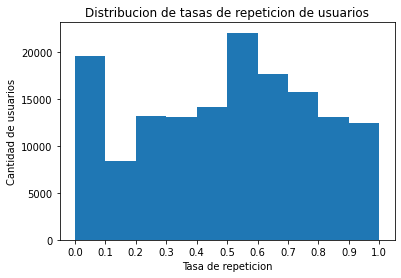

In [71]:
# Se grafica un histograma de 10 bines para separar la tasa de repeticion de 10% en 10%
merged_df.groupby('user_id').mean()['reordered'].plot(kind='hist',
                                                      bins=10,
                                                     title='Distribucion de tasas de repeticion de usuarios')
plt.xlabel('Tasa de repeticion')
plt.ylabel('Cantidad de usuarios')
plt.xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.show()

In [72]:
# Se inspecciona el primer bin para observar la cantidad de tasas de repeticion cero presentes
(merged_df.groupby('user_id').mean()['reordered'] == 0).sum()

16635

Escribe aquí tus conclusiones
 - Se puede observar del histograma que la mayor cantidad de usuarios presenta una tasa de repeticion de entre 50% y 60% en sus pedidos. Es decir, contando todos sus pedidos, la mitad de los productos que piden son productos pedidos anterioremente.
 - Luego, otra buena porcion de usuarios tiene una tasa de repeticion en sus pedidos (0% a 10%). Esto se debe a que buena parte de los productos de esos pedidos corresponde a productos pedidos por primera vez. Es decir, la gran parte de sus productos son pedidos por primera vez. Esto puede ser bastante comun en usuarios nuevos.
 - El resto de usuarios presenta por lo general tasas de repeticion en sus pedidos de entre 20% y 50% o entre 80% y 100%. La distribucion en estos rangos es bastante uniforme (parecida cantidad de usuarios en cada bin). Esto a excepcion de un grupo de usuarios con mayor cantidad de usuarios por bin y tasas entre 60% y 80%.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [73]:
# Se filtran los datos por ser los primeros en ser agregados al carrito
# Se cuentan las instancias de cada id de producto y se seleccionan los 20 primeros
# Se guardan los ids de los productos en una variable
index_top20_1stadded_products = order_products[(order_products['add_to_cart_order'] == 1)]['product_id'].value_counts().index[0:20]
values_top20_1stadded_products = order_products[(order_products['add_to_cart_order'] == 1)]['product_id'].value_counts().values[0:20]

print(index_top20_1stadded_products)
print()
print(values_top20_1stadded_products)

Int64Index([24852, 13176, 27845, 21137, 47209, 21903, 47766, 19660, 16797,
            27966, 44632, 49235, 47626,   196, 38689, 26209, 12341,  5785,
            27086, 22935],
           dtype='int64')

[15562 11026  4363  3946  3390  3336  3044  2336  2308  2024  1914  1797
  1737  1733  1397  1370  1340  1310  1309  1246]


In [74]:
# Se filtran los datos verificando si los ids de los productos pertecen a la lista
products[products['product_id'].isin(index_top20_1stadded_products)]

,product_id,product_name,aisle_id,department_id
195,196,soda,77,7
5784,5785,organic reduced fat 2% milk,84,16
12340,12341,hass avocados,32,4
13175,13176,bag of organic bananas,24,4
16796,16797,strawberries,24,4
19659,19660,spring water,115,7
21136,21137,organic strawberries,24,4
21902,21903,organic baby spinach,123,4
22934,22935,organic yellow onion,83,4
24851,24852,banana,24,4


In [75]:
# Se guardas los datos en una variable auxiliar
top20_1stadded_products = products[products['product_id'].isin(index_top20_1stadded_products)][['product_id', 'product_name']]
# Se crea un indice auxiliar
index_top20_1stadded_products_Series = pd.Series(index_top20_1stadded_products)
top20_1stadded_products['index'] = index_top20_1stadded_products_Series.sort_values().index
# Se ordenan los resultados de acorde al indice auxiliar
top20_1stadded_products = top20_1stadded_products.sort_values('index')[['product_id', 'product_name']]
top20_1stadded_products

,product_id,product_name
24851,24852,banana
13175,13176,bag of organic bananas
27844,27845,organic whole milk
21136,21137,organic strawberries
47208,47209,organic hass avocado
21902,21903,organic baby spinach
47765,47766,organic avocado
19659,19660,spring water
16796,16797,strawberries
27965,27966,organic raspberries


In [76]:
# Se agregan los datos del numero de veces que los productos fueron puestos primero en el carrito
top20_1stadded_products['times_being_1st_added_to_cart'] = values_top20_1stadded_products
top20_1stadded_products

,product_id,product_name,times_being_1st_added_to_cart
24851,24852,banana,15562
13175,13176,bag of organic bananas,11026
27844,27845,organic whole milk,4363
21136,21137,organic strawberries,3946
47208,47209,organic hass avocado,3390
21902,21903,organic baby spinach,3336
47765,47766,organic avocado,3044
19659,19660,spring water,2336
16796,16797,strawberries,2308
27965,27966,organic raspberries,2024


Escribe aquí tus conclusiones
 - Existe bastante sobrelapamiento entre los productos mas pedidos, los mas repedidos y los que terminan primeros en el carrito de compras.
 - El sobrelapamiento tiene sentido, ya que si un consumible gusta mucho es normal que lo volvamos a pedir e incluso que, cuando se acabe, sea lo primero que pongamos en el carrito.
 - Se observa que los productos pertecen a 3 departamentos: 4, 16 y 7
 - En este caso existe un poco mas de variedad en los aisles en comparacion con los casos anteriores.
 - Los productos son en su mayoria consumibles organicos
 - Las veces que fueron puestas en el carrito oscilan principalmente entre 1000 y 4000, salvo dos excepciones.
 - Estas excepciones son bastante notables ya que superan con creces a los demas productos y concuerdan a su vez con ser de los primeros en popularidad de productos pedidos y repedidos.

### Conclusion general del proyecto:

Este proyecto fue bastante demandante en comparacion a los primeros.
Lo solicitado es lograble con las herramientas aprendidas en este sprint.
Si bien encuentro el proyecto bastante demandante en terminos de tiempo (sobre todo la parte de pre analisis, de la limpieza de datos, gestion de duplicados y ausentes), me parecio de buen nivel en cuanto a la dificultad.
Me senti retado en cuanto a veces sabia que era o que se me pedia y que era lo que tenia que hacer, mas no sabia como hacerlo y tuve que rememorar lo aprendido en el sprint.
Si debo sacar conclusiones fuertes de los datos diria que:
 - las bananas son MUY populares
 - los clientes tienden a pedir los mismos productos alrededor de la mitad del carrito, o a pedir productos nuevos
 - de todas las veces que se pide un producto, por lo general la mitad de esas veces es un repedido
 - los productos organicos son muy populares
 - los clientes no suelen comprar mas de 10 articulos por pedido
 - la gran mayoria de clientes suele realizar una cantidad pequenha de pedidos (se puede modelar facilemente)
 - los clientes suelen hacer pedidos mensuales, semanales y quincenales
 - los domingos y lunes hay mayor cantidad de pedidos
 - la mayor cantidad de pedidos se registra entre las 10 y las 4